# 1. Count barley pangenome gene duplication and deletion; for retention rate analyses

# 2. generate pan gene pairs for homologous gene for kaks calculation, match with gene duplication type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data="pangenome_matrix_t0.tr.tab"

In [3]:
df=pd.read_csv(data,sep='\t')
df.head()

,source:/data/wheat_pangenome_clustering/version2/clusters_cds_t3,TraesARI.fna.nucl,TraesCADENZA.fna.nucl,TraesCHINESESPRING.fna.nucl,TraesCLAIRE.fna.nucl,TraesJAGGER.fna.nucl,TraesJULIUS.fna.nucl,TraesLANCER.fna.nucl,TraesLANDMARK.fna.nucl,TraesMACE.fna.nucl,TraesMAT.fna.nucl,TraesNOR.fna.nucl,TraesPARAGON.fna.nucl,TraesROBIGUS.fna.nucl,TraesSTANLEY.fna.nucl,TraesWEEBIL.fna.nucl,Unnamed: 16
0,5_TraesARI7B03G04194650.1.fna,3,0,0,0,4,0,3,4,4,3,4,0,0,4,0,NaN
1,13_TraesARI6D03G03681610.1.fna,3,0,0,0,3,3,2,3,3,2,2,0,0,3,0,NaN
2,26_TraesARI2A03G00630600.1.fna,4,0,0,0,0,0,3,5,4,4,5,0,2,3,1,NaN
3,35_TraesARI5A03G02669120.2.fna,5,1,0,1,3,7,5,4,5,4,4,0,1,4,1,NaN
4,39_TraesARI7B03G04280480.1.fna,3,0,0,1,3,3,4,4,3,4,5,0,0,4,0,NaN


In [4]:
newcolumn = [col.split(".")[0] for col in df.columns]
df.columns = newcolumn
df.head()

,source:/data/wheat_pangenome_clustering/version2/clusters_cds_t3,TraesARI,TraesCADENZA,TraesCHINESESPRING,TraesCLAIRE,TraesJAGGER,TraesJULIUS,TraesLANCER,TraesLANDMARK,TraesMACE,TraesMAT,TraesNOR,TraesPARAGON,TraesROBIGUS,TraesSTANLEY,TraesWEEBIL,Unnamed: 16
0,5_TraesARI7B03G04194650.1.fna,3,0,0,0,4,0,3,4,4,3,4,0,0,4,0,NaN
1,13_TraesARI6D03G03681610.1.fna,3,0,0,0,3,3,2,3,3,2,2,0,0,3,0,NaN
2,26_TraesARI2A03G00630600.1.fna,4,0,0,0,0,0,3,5,4,4,5,0,2,3,1,NaN
3,35_TraesARI5A03G02669120.2.fna,5,1,0,1,3,7,5,4,5,4,4,0,1,4,1,NaN
4,39_TraesARI7B03G04280480.1.fna,3,0,0,1,3,3,4,4,3,4,5,0,0,4,0,NaN


In [10]:
df.columns

Index(['Label', 'TraesARINALRFOR', 'TraesCADENZA', 'TraesCHINESESPRING',
       'TraesCLAIRE', 'TraesJAGGER', 'TraesJULIUS', 'TraesLANCER',
       'TraesLANDMARK', 'TraesMACE', 'TraesMATTIS', 'TraesNORIN',
       'TraesPARAGON', 'TraesROBIGUS', 'TraesSTANLEY', 'TraesWEEBIL',
       'Unnamed: 16'],
      dtype='object')

In [5]:
#df=df.rename(columns = {'source:/data/wheat_pangenome_clustering/clusters_cds_t3':'Label'})
df = df.drop('Unnamed: 16', 1)

In [6]:
df.head()

,source:/data/wheat_pangenome_clustering/version2/clusters_cds_t3,TraesARI,TraesCADENZA,TraesCHINESESPRING,TraesCLAIRE,TraesJAGGER,TraesJULIUS,TraesLANCER,TraesLANDMARK,TraesMACE,TraesMAT,TraesNOR,TraesPARAGON,TraesROBIGUS,TraesSTANLEY,TraesWEEBIL
0,5_TraesARI7B03G04194650.1.fna,3,0,0,0,4,0,3,4,4,3,4,0,0,4,0
1,13_TraesARI6D03G03681610.1.fna,3,0,0,0,3,3,2,3,3,2,2,0,0,3,0
2,26_TraesARI2A03G00630600.1.fna,4,0,0,0,0,0,3,5,4,4,5,0,2,3,1
3,35_TraesARI5A03G02669120.2.fna,5,1,0,1,3,7,5,4,5,4,4,0,1,4,1
4,39_TraesARI7B03G04280480.1.fna,3,0,0,1,3,3,4,4,3,4,5,0,0,4,0


In [7]:
df.columns.to_list()

['source:/data/wheat_pangenome_clustering/version2/clusters_cds_t3',
 'TraesARI',
 'TraesCADENZA',
 'TraesCHINESESPRING',
 'TraesCLAIRE',
 'TraesJAGGER',
 'TraesJULIUS',
 'TraesLANCER',
 'TraesLANDMARK',
 'TraesMACE',
 'TraesMAT',
 'TraesNOR',
 'TraesPARAGON',
 'TraesROBIGUS',
 'TraesSTANLEY',
 'TraesWEEBIL']

In [8]:
##first column name to "Label"
newcolumn = df.columns.to_list()[1:]
df.columns = ["Label"] + newcolumn
df.head()

,Label,TraesARI,TraesCADENZA,TraesCHINESESPRING,TraesCLAIRE,TraesJAGGER,TraesJULIUS,TraesLANCER,TraesLANDMARK,TraesMACE,TraesMAT,TraesNOR,TraesPARAGON,TraesROBIGUS,TraesSTANLEY,TraesWEEBIL
0,5_TraesARI7B03G04194650.1.fna,3,0,0,0,4,0,3,4,4,3,4,0,0,4,0
1,13_TraesARI6D03G03681610.1.fna,3,0,0,0,3,3,2,3,3,2,2,0,0,3,0
2,26_TraesARI2A03G00630600.1.fna,4,0,0,0,0,0,3,5,4,4,5,0,2,3,1
3,35_TraesARI5A03G02669120.2.fna,5,1,0,1,3,7,5,4,5,4,4,0,1,4,1
4,39_TraesARI7B03G04280480.1.fna,3,0,0,1,3,3,4,4,3,4,5,0,0,4,0


In [9]:
df.shape

(96891, 16)

In [10]:
## filter reference seq as Morex gene
df = df[df['Label'].str.contains("TraesCS")]

In [11]:
df.head()

,Label,TraesARI,TraesCADENZA,TraesCHINESESPRING,TraesCLAIRE,TraesJAGGER,TraesJULIUS,TraesLANCER,TraesLANDMARK,TraesMACE,TraesMAT,TraesNOR,TraesPARAGON,TraesROBIGUS,TraesSTANLEY,TraesWEEBIL
36161,290669_TraesCS1A02G143400.1.fna,4,3,3,0,3,5,5,3,4,6,4,0,0,4,0
36162,290677_TraesCS2A02G556200.1.fna,3,1,3,2,5,3,4,4,3,4,3,0,2,3,1
36163,290680_TraesCS5D02G343100.1.fna,0,1,1,1,0,0,0,0,3,0,0,1,1,0,1
36164,290681_TraesCS6B02G122200.1.fna,3,1,1,1,2,5,2,1,2,2,2,1,1,1,1
36165,290691_TraesCS6A02G093300.2.fna,2,1,2,1,0,1,2,2,0,2,1,1,1,2,1


In [12]:
df.shape

(53858, 16)

In [13]:
df["Label"] = df["Label"].str.split("_",1,expand=True)[1]

In [14]:
df.head()

,Label,TraesARI,TraesCADENZA,TraesCHINESESPRING,TraesCLAIRE,TraesJAGGER,TraesJULIUS,TraesLANCER,TraesLANDMARK,TraesMACE,TraesMAT,TraesNOR,TraesPARAGON,TraesROBIGUS,TraesSTANLEY,TraesWEEBIL
36161,TraesCS1A02G143400.1.fna,4,3,3,0,3,5,5,3,4,6,4,0,0,4,0
36162,TraesCS2A02G556200.1.fna,3,1,3,2,5,3,4,4,3,4,3,0,2,3,1
36163,TraesCS5D02G343100.1.fna,0,1,1,1,0,0,0,0,3,0,0,1,1,0,1
36164,TraesCS6B02G122200.1.fna,3,1,1,1,2,5,2,1,2,2,2,1,1,1,1
36165,TraesCS6A02G093300.2.fna,2,1,2,1,0,1,2,2,0,2,1,1,1,2,1


In [15]:
import seaborn as sns

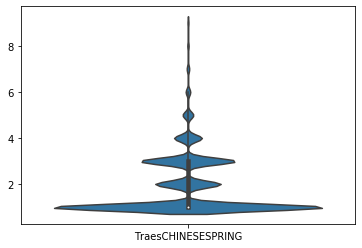

In [16]:
sns.violinplot(data=df[["TraesCHINESESPRING"]][df["TraesCHINESESPRING"]<10],showfliers = False)

In [17]:
for col in df.columns[1:]:
    if col !="TraesCHINESESPRING":
        #df[df[col]==0]["Label"].to_csv("deletion0_"+col+".txt", index=None,header=False)
        #df[df[col]<3]["Label"].to_csv("deletion3_"+col+".txt", index=None,header=False)
        df[df[col]<df["TraesCHINESESPRING"]]["Label"].to_csv("deletion_lowerCS_"+col+".txt", index=None,header=False)


## generate pan gene pairs

In [19]:
import pandas as pd
from itertools import combinations
import numpy as np

In [20]:
gene_matrix = "pangenome_matrix_genes_t0.tr.tab"

In [21]:
DF = pd.read_csv(gene_matrix,header=0, sep = '\t',index_col=0)
DF.head()

,Akashinriki.fna.nucl,B1K-04-12.fna.nucl,Barke.fna.nucl,Golden_Promise.fna.nucl,HOR_10350.fna.nucl,HOR_13821.fna.nucl,HOR_13942.fna.nucl,HOR_21599.fna.nucl,HOR_3081.fna.nucl,HOR_3365.fna.nucl,...,HOR_8148.fna.nucl,HOR_9043.fna.nucl,Hockett.fna.nucl,Igri.fna.nucl,Morex.fna.nucl,OUN333.fna.nucl,RGT_Planet.fna.nucl,ZDM01467.fna.nucl,ZDM02064.fna.nucl,Unnamed: 21
source:/data/pangenome_cluster_analysis/clusters_cds_t3,,,,,,,,,,,,,,,,,,,,,
245_Horvu_AKASHIN_Un01G001600.1.fna,"Horvu_AKASHIN_Un01G001600.1,",-,"Horvu_BARKE_4H01G004600.1,","Horvu_GOLDEN_Un01G008000.1,",-,-,-,-,"Horvu_3081_4H01G003100.1,",-,...,-,-,"Horvu_HOCKETT_Un01G010700.1,","Horvu_IGRI_4H01G004700.1,",-,"Horvu_OUN333_4H01G004100.1,","Horvu_PLANET_Un01G004700.1,","Horvu_HUANG_Un01G008500.1,","Horvu_CHIBA_4H01G004800.1,",NaN
247_Horvu_AKASHIN_7H01G134100.1.fna,"Horvu_AKASHIN_7H01G134100.1,",-,-,-,"Horvu_10350_7H01G149800.1,",-,-,-,-,-,...,-,"Horvu_9043_7H01G144100.1,","Horvu_HOCKETT_Un01G216900.1,",-,-,-,-,-,"Horvu_CHIBA_7H01G132600.1,",NaN
311_Horvu_AKASHIN_1H01G008000.1.fna,"Horvu_AKASHIN_1H01G008000.1,",-,-,-,"Horvu_10350_1H01G009500.1,",-,-,-,-,"Horvu_HHOR_1H01G007900.1,",...,"Horvu_8148_1H01G007500.1,","Horvu_9043_1H01G008400.1,",-,-,-,-,-,"Horvu_HUANG_Un01G033000.1,","Horvu_CHIBA_Un01G007900.1,Horvu_CHIBA_Un01G149...",NaN
345_Horvu_AKASHIN_2H01G445100.1.fna,"Horvu_AKASHIN_2H01G445100.1,Horvu_AKASHIN_5H01...",-,-,"Horvu_GOLDEN_7H01G559200.1,",-,-,"Horvu_13942_6H01G490900.1,Horvu_13942_7H01G103...",-,"Horvu_3081_2H01G070300.1,Horvu_3081_2H01G59750...",-,...,"Horvu_8148_2H01G444800.1,Horvu_8148_2H01G48360...","Horvu_9043_4H01G513700.1,Horvu_9043_5H01G03970...","Horvu_HOCKETT_2H01G058700.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_2H01G596200.1,Horvu_IGRI_6H01G00380...",-,-,"Horvu_PLANET_1H01G013700.1,Horvu_PLANET_2H01G0...","Horvu_HUANG_1H01G024200.1,Horvu_HUANG_2H01G746...","Horvu_CHIBA_2H01G443100.1,Horvu_CHIBA_2H01G752...",NaN
391_Horvu_AKASHIN_5H01G712000.1.fna,"Horvu_AKASHIN_5H01G712000.1,",-,"Horvu_BARKE_5H01G738300.1,","Horvu_GOLDEN_Un01G218400.1,",-,"Horvu_13821_5H01G710500.1,","Horvu_13942_5H01G710200.1,",-,"Horvu_3081_5H01G725100.1,","Horvu_HHOR_5H01G700500.1,",...,"Horvu_8148_5H01G725700.1,",-,-,"Horvu_IGRI_5H01G715600.1,",-,"Horvu_OUN333_5H01G707600.1,","Horvu_PLANET_5H01G725200.1,",-,"Horvu_CHIBA_5H01G710700.1,",NaN


In [22]:
DF.columns

Index(['Akashinriki.fna.nucl', 'B1K-04-12.fna.nucl', 'Barke.fna.nucl',
       'Golden_Promise.fna.nucl', 'HOR_10350.fna.nucl', 'HOR_13821.fna.nucl',
       'HOR_13942.fna.nucl', 'HOR_21599.fna.nucl', 'HOR_3081.fna.nucl',
       'HOR_3365.fna.nucl', 'HOR_7552.fna.nucl', 'HOR_8148.fna.nucl',
       'HOR_9043.fna.nucl', 'Hockett.fna.nucl', 'Igri.fna.nucl',
       'Morex.fna.nucl', 'OUN333.fna.nucl', 'RGT_Planet.fna.nucl',
       'ZDM01467.fna.nucl', 'ZDM02064.fna.nucl', 'Unnamed: 21'],
      dtype='object')

In [23]:
newcolumn = [col.split(".")[0] for col in DF.columns]
DF.columns = newcolumn
DF.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,...,HOR_8148,HOR_9043,Hockett,Igri,Morex,OUN333,RGT_Planet,ZDM01467,ZDM02064,Unnamed: 21
source:/data/pangenome_cluster_analysis/clusters_cds_t3,,,,,,,,,,,,,,,,,,,,,
245_Horvu_AKASHIN_Un01G001600.1.fna,"Horvu_AKASHIN_Un01G001600.1,",-,"Horvu_BARKE_4H01G004600.1,","Horvu_GOLDEN_Un01G008000.1,",-,-,-,-,"Horvu_3081_4H01G003100.1,",-,...,-,-,"Horvu_HOCKETT_Un01G010700.1,","Horvu_IGRI_4H01G004700.1,",-,"Horvu_OUN333_4H01G004100.1,","Horvu_PLANET_Un01G004700.1,","Horvu_HUANG_Un01G008500.1,","Horvu_CHIBA_4H01G004800.1,",NaN
247_Horvu_AKASHIN_7H01G134100.1.fna,"Horvu_AKASHIN_7H01G134100.1,",-,-,-,"Horvu_10350_7H01G149800.1,",-,-,-,-,-,...,-,"Horvu_9043_7H01G144100.1,","Horvu_HOCKETT_Un01G216900.1,",-,-,-,-,-,"Horvu_CHIBA_7H01G132600.1,",NaN
311_Horvu_AKASHIN_1H01G008000.1.fna,"Horvu_AKASHIN_1H01G008000.1,",-,-,-,"Horvu_10350_1H01G009500.1,",-,-,-,-,"Horvu_HHOR_1H01G007900.1,",...,"Horvu_8148_1H01G007500.1,","Horvu_9043_1H01G008400.1,",-,-,-,-,-,"Horvu_HUANG_Un01G033000.1,","Horvu_CHIBA_Un01G007900.1,Horvu_CHIBA_Un01G149...",NaN
345_Horvu_AKASHIN_2H01G445100.1.fna,"Horvu_AKASHIN_2H01G445100.1,Horvu_AKASHIN_5H01...",-,-,"Horvu_GOLDEN_7H01G559200.1,",-,-,"Horvu_13942_6H01G490900.1,Horvu_13942_7H01G103...",-,"Horvu_3081_2H01G070300.1,Horvu_3081_2H01G59750...",-,...,"Horvu_8148_2H01G444800.1,Horvu_8148_2H01G48360...","Horvu_9043_4H01G513700.1,Horvu_9043_5H01G03970...","Horvu_HOCKETT_2H01G058700.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_2H01G596200.1,Horvu_IGRI_6H01G00380...",-,-,"Horvu_PLANET_1H01G013700.1,Horvu_PLANET_2H01G0...","Horvu_HUANG_1H01G024200.1,Horvu_HUANG_2H01G746...","Horvu_CHIBA_2H01G443100.1,Horvu_CHIBA_2H01G752...",NaN
391_Horvu_AKASHIN_5H01G712000.1.fna,"Horvu_AKASHIN_5H01G712000.1,",-,"Horvu_BARKE_5H01G738300.1,","Horvu_GOLDEN_Un01G218400.1,",-,"Horvu_13821_5H01G710500.1,","Horvu_13942_5H01G710200.1,",-,"Horvu_3081_5H01G725100.1,","Horvu_HHOR_5H01G700500.1,",...,"Horvu_8148_5H01G725700.1,",-,-,"Horvu_IGRI_5H01G715600.1,",-,"Horvu_OUN333_5H01G707600.1,","Horvu_PLANET_5H01G725200.1,",-,"Horvu_CHIBA_5H01G710700.1,",NaN


In [24]:
DF_MOREX = DF[DF.index.str.contains("MOREX")]
DF_MOREX.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,...,HOR_8148,HOR_9043,Hockett,Igri,Morex,OUN333,RGT_Planet,ZDM01467,ZDM02064,Unnamed: 21
source:/data/pangenome_cluster_analysis/clusters_cds_t3,,,,,,,,,,,,,,,,,,,,,
676266_Horvu_MOREX_1H01G240300.1.fna,"Horvu_AKASHIN_1H01G226200.1,","Horvu_FT11_1H01G235900.1,","Horvu_BARKE_1H01G243000.1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_10350_1H01G236600.1,","Horvu_13821_1H01G223500.1,","Horvu_13942_1H01G222200.1,","Horvu_21599_1H01G221800.1,","Horvu_3081_1H01G231300.1,","Horvu_HHOR_1H01G226400.1,",...,"Horvu_8148_1H01G226100.1,","Horvu_9043_1H01G226300.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_OUN333_1H01G224100.1,","Horvu_PLANET_1H01G234500.1,","Horvu_HUANG_1H01G213400.1,","Horvu_CHIBA_1H01G214000.1,",NaN
676267_Horvu_MOREX_5H01G284200.1.fna,"Horvu_AKASHIN_5H01G267000.1,","Horvu_FT11_5H01G274800.1,","Horvu_BARKE_5H01G280000.1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_10350_5H01G273700.1,","Horvu_13821_5H01G262300.1,","Horvu_13942_5H01G264100.1,","Horvu_21599_5H01G262600.1,","Horvu_3081_5H01G272400.1,","Horvu_HHOR_5H01G268200.1,",...,"Horvu_8148_5H01G274100.1,","Horvu_9043_5H01G266400.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_OUN333_5H01G270700.1,","Horvu_PLANET_5H01G273800.1,","Horvu_HUANG_5H01G257300.1,","Horvu_CHIBA_5H01G266500.1,",NaN
676268_Horvu_MOREX_2H01G748500.1.fna,"Horvu_AKASHIN_2H01G719600.1,","Horvu_FT11_2H01G723900.1,","Horvu_BARKE_2H01G731300.1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_10350_2H01G726900.1,","Horvu_13821_2H01G717000.1,","Horvu_13942_2H01G713900.1,","Horvu_21599_2H01G717500.1,","Horvu_3081_2H01G723100.1,","Horvu_HHOR_2H01G715000.1,",...,"Horvu_8148_2H01G715100.1,","Horvu_9043_2H01G718500.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_OUN333_2H01G715700.1,","Horvu_PLANET_2H01G723200.1,","Horvu_HUANG_2H01G712500.1,","Horvu_CHIBA_2H01G720000.1,",NaN
676269_Horvu_MOREX_6H01G294100.1.fna,"Horvu_AKASHIN_6H01G269100.1,","Horvu_FT11_6H01G286000.1,","Horvu_BARKE_6H01G286000.1,","Horvu_GOLDEN_6H01G249900.1,","Horvu_10350_6H01G283600.1,","Horvu_13821_6H01G273600.1,","Horvu_13942_6H01G270100.1,","Horvu_21599_6H01G278800.1,","Horvu_3081_6H01G253300.1,","Horvu_HHOR_6H01G268700.1,",...,"Horvu_8148_6H01G279700.1,","Horvu_9043_6H01G273800.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_OUN333_6H01G276500.1,","Horvu_PLANET_6H01G281300.1,","Horvu_HUANG_6H01G269700.1,","Horvu_CHIBA_6H01G274000.1,",NaN
676270_Horvu_MOREX_1H01G348900.1.fna,"Horvu_AKASHIN_1H01G332200.1,","Horvu_FT11_1H01G342700.1,","Horvu_BARKE_1H01G347700.1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_10350_1H01G341300.1,","Horvu_13821_1H01G330800.1,","Horvu_13942_1H01G327200.1,","Horvu_21599_1H01G328200.1,","Horvu_3081_1H01G336600.1,","Horvu_HHOR_1H01G330800.1,",...,"Horvu_8148_1H01G332100.1,","Horvu_9043_1H01G332900.1,","Horvu_HOCKETT_1H01G319200.1,",-,"Horvu_MOREX_1H01G348900.1,","Horvu_OUN333_1H01G330800.1,","Horvu_PLANET_1H01G338400.1,","Horvu_HUANG_1H01G319200.1,","Horvu_CHIBA_1H01G319700.1,",NaN


In [25]:
DF_MOREX = DF_MOREX.replace('-', np.nan)
DF_MOREX.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,...,HOR_8148,HOR_9043,Hockett,Igri,Morex,OUN333,RGT_Planet,ZDM01467,ZDM02064,Unnamed: 21
source:/data/pangenome_cluster_analysis/clusters_cds_t3,,,,,,,,,,,,,,,,,,,,,
676266_Horvu_MOREX_1H01G240300.1.fna,"Horvu_AKASHIN_1H01G226200.1,","Horvu_FT11_1H01G235900.1,","Horvu_BARKE_1H01G243000.1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_10350_1H01G236600.1,","Horvu_13821_1H01G223500.1,","Horvu_13942_1H01G222200.1,","Horvu_21599_1H01G221800.1,","Horvu_3081_1H01G231300.1,","Horvu_HHOR_1H01G226400.1,",...,"Horvu_8148_1H01G226100.1,","Horvu_9043_1H01G226300.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_OUN333_1H01G224100.1,","Horvu_PLANET_1H01G234500.1,","Horvu_HUANG_1H01G213400.1,","Horvu_CHIBA_1H01G214000.1,",NaN
676267_Horvu_MOREX_5H01G284200.1.fna,"Horvu_AKASHIN_5H01G267000.1,","Horvu_FT11_5H01G274800.1,","Horvu_BARKE_5H01G280000.1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_10350_5H01G273700.1,","Horvu_13821_5H01G262300.1,","Horvu_13942_5H01G264100.1,","Horvu_21599_5H01G262600.1,","Horvu_3081_5H01G272400.1,","Horvu_HHOR_5H01G268200.1,",...,"Horvu_8148_5H01G274100.1,","Horvu_9043_5H01G266400.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_OUN333_5H01G270700.1,","Horvu_PLANET_5H01G273800.1,","Horvu_HUANG_5H01G257300.1,","Horvu_CHIBA_5H01G266500.1,",NaN
676268_Horvu_MOREX_2H01G748500.1.fna,"Horvu_AKASHIN_2H01G719600.1,","Horvu_FT11_2H01G723900.1,","Horvu_BARKE_2H01G731300.1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_10350_2H01G726900.1,","Horvu_13821_2H01G717000.1,","Horvu_13942_2H01G713900.1,","Horvu_21599_2H01G717500.1,","Horvu_3081_2H01G723100.1,","Horvu_HHOR_2H01G715000.1,",...,"Horvu_8148_2H01G715100.1,","Horvu_9043_2H01G718500.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_OUN333_2H01G715700.1,","Horvu_PLANET_2H01G723200.1,","Horvu_HUANG_2H01G712500.1,","Horvu_CHIBA_2H01G720000.1,",NaN
676269_Horvu_MOREX_6H01G294100.1.fna,"Horvu_AKASHIN_6H01G269100.1,","Horvu_FT11_6H01G286000.1,","Horvu_BARKE_6H01G286000.1,","Horvu_GOLDEN_6H01G249900.1,","Horvu_10350_6H01G283600.1,","Horvu_13821_6H01G273600.1,","Horvu_13942_6H01G270100.1,","Horvu_21599_6H01G278800.1,","Horvu_3081_6H01G253300.1,","Horvu_HHOR_6H01G268700.1,",...,"Horvu_8148_6H01G279700.1,","Horvu_9043_6H01G273800.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_OUN333_6H01G276500.1,","Horvu_PLANET_6H01G281300.1,","Horvu_HUANG_6H01G269700.1,","Horvu_CHIBA_6H01G274000.1,",NaN
676270_Horvu_MOREX_1H01G348900.1.fna,"Horvu_AKASHIN_1H01G332200.1,","Horvu_FT11_1H01G342700.1,","Horvu_BARKE_1H01G347700.1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_10350_1H01G341300.1,","Horvu_13821_1H01G330800.1,","Horvu_13942_1H01G327200.1,","Horvu_21599_1H01G328200.1,","Horvu_3081_1H01G336600.1,","Horvu_HHOR_1H01G330800.1,",...,"Horvu_8148_1H01G332100.1,","Horvu_9043_1H01G332900.1,","Horvu_HOCKETT_1H01G319200.1,",NaN,"Horvu_MOREX_1H01G348900.1,","Horvu_OUN333_1H01G330800.1,","Horvu_PLANET_1H01G338400.1,","Horvu_HUANG_1H01G319200.1,","Horvu_CHIBA_1H01G319700.1,",NaN


In [26]:
DF_MOREX = DF_MOREX[DF_MOREX.columns[:-1]]
DF_MOREX.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,HOR_7552,HOR_8148,HOR_9043,Hockett,Igri,Morex,OUN333,RGT_Planet,ZDM01467,ZDM02064
source:/data/pangenome_cluster_analysis/clusters_cds_t3,,,,,,,,,,,,,,,,,,,,
676266_Horvu_MOREX_1H01G240300.1.fna,"Horvu_AKASHIN_1H01G226200.1,","Horvu_FT11_1H01G235900.1,","Horvu_BARKE_1H01G243000.1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_10350_1H01G236600.1,","Horvu_13821_1H01G223500.1,","Horvu_13942_1H01G222200.1,","Horvu_21599_1H01G221800.1,","Horvu_3081_1H01G231300.1,","Horvu_HHOR_1H01G226400.1,","Horvu_7552_1H01G230400.1,","Horvu_8148_1H01G226100.1,","Horvu_9043_1H01G226300.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_OUN333_1H01G224100.1,","Horvu_PLANET_1H01G234500.1,","Horvu_HUANG_1H01G213400.1,","Horvu_CHIBA_1H01G214000.1,"
676267_Horvu_MOREX_5H01G284200.1.fna,"Horvu_AKASHIN_5H01G267000.1,","Horvu_FT11_5H01G274800.1,","Horvu_BARKE_5H01G280000.1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_10350_5H01G273700.1,","Horvu_13821_5H01G262300.1,","Horvu_13942_5H01G264100.1,","Horvu_21599_5H01G262600.1,","Horvu_3081_5H01G272400.1,","Horvu_HHOR_5H01G268200.1,","Horvu_7552_5H01G268900.1,","Horvu_8148_5H01G274100.1,","Horvu_9043_5H01G266400.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_OUN333_5H01G270700.1,","Horvu_PLANET_5H01G273800.1,","Horvu_HUANG_5H01G257300.1,","Horvu_CHIBA_5H01G266500.1,"
676268_Horvu_MOREX_2H01G748500.1.fna,"Horvu_AKASHIN_2H01G719600.1,","Horvu_FT11_2H01G723900.1,","Horvu_BARKE_2H01G731300.1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_10350_2H01G726900.1,","Horvu_13821_2H01G717000.1,","Horvu_13942_2H01G713900.1,","Horvu_21599_2H01G717500.1,","Horvu_3081_2H01G723100.1,","Horvu_HHOR_2H01G715000.1,","Horvu_7552_2H01G717600.1,","Horvu_8148_2H01G715100.1,","Horvu_9043_2H01G718500.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_OUN333_2H01G715700.1,","Horvu_PLANET_2H01G723200.1,","Horvu_HUANG_2H01G712500.1,","Horvu_CHIBA_2H01G720000.1,"
676269_Horvu_MOREX_6H01G294100.1.fna,"Horvu_AKASHIN_6H01G269100.1,","Horvu_FT11_6H01G286000.1,","Horvu_BARKE_6H01G286000.1,","Horvu_GOLDEN_6H01G249900.1,","Horvu_10350_6H01G283600.1,","Horvu_13821_6H01G273600.1,","Horvu_13942_6H01G270100.1,","Horvu_21599_6H01G278800.1,","Horvu_3081_6H01G253300.1,","Horvu_HHOR_6H01G268700.1,","Horvu_7552_6H01G273600.1,","Horvu_8148_6H01G279700.1,","Horvu_9043_6H01G273800.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_OUN333_6H01G276500.1,","Horvu_PLANET_6H01G281300.1,","Horvu_HUANG_6H01G269700.1,","Horvu_CHIBA_6H01G274000.1,"
676270_Horvu_MOREX_1H01G348900.1.fna,"Horvu_AKASHIN_1H01G332200.1,","Horvu_FT11_1H01G342700.1,","Horvu_BARKE_1H01G347700.1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_10350_1H01G341300.1,","Horvu_13821_1H01G330800.1,","Horvu_13942_1H01G327200.1,","Horvu_21599_1H01G328200.1,","Horvu_3081_1H01G336600.1,","Horvu_HHOR_1H01G330800.1,","Horvu_7552_1H01G336200.1,","Horvu_8148_1H01G332100.1,","Horvu_9043_1H01G332900.1,","Horvu_HOCKETT_1H01G319200.1,",NaN,"Horvu_MOREX_1H01G348900.1,","Horvu_OUN333_1H01G330800.1,","Horvu_PLANET_1H01G338400.1,","Horvu_HUANG_1H01G319200.1,","Horvu_CHIBA_1H01G319700.1,"


In [27]:
# df_obj = DF_MOREX.select_dtypes(['object'])
# df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
DF_MOREX=DF_MOREX.apply(lambda x: x.str.strip(','))

In [28]:
DF_MOREX.set_index('Morex',inplace=True)

In [29]:
DF_MOREX['Merged'] = DF_MOREX.apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [30]:
DF_MOREX.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,HOR_7552,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged
Morex,,,,,,,,,,,,,,,,,,,,
Horvu_MOREX_1H01G240300.1,Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G235900.1,Horvu_BARKE_1H01G243000.1,Horvu_GOLDEN_1H01G192000.1,Horvu_10350_1H01G236600.1,Horvu_13821_1H01G223500.1,Horvu_13942_1H01G222200.1,Horvu_21599_1H01G221800.1,Horvu_3081_1H01G231300.1,Horvu_HHOR_1H01G226400.1,Horvu_7552_1H01G230400.1,Horvu_8148_1H01G226100.1,Horvu_9043_1H01G226300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_OUN333_1H01G224100.1,Horvu_PLANET_1H01G234500.1,Horvu_HUANG_1H01G213400.1,Horvu_CHIBA_1H01G214000.1,"Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G23..."
Horvu_MOREX_5H01G284200.1,Horvu_AKASHIN_5H01G267000.1,Horvu_FT11_5H01G274800.1,Horvu_BARKE_5H01G280000.1,Horvu_GOLDEN_5H01G243900.1,Horvu_10350_5H01G273700.1,Horvu_13821_5H01G262300.1,Horvu_13942_5H01G264100.1,Horvu_21599_5H01G262600.1,Horvu_3081_5H01G272400.1,Horvu_HHOR_5H01G268200.1,Horvu_7552_5H01G268900.1,Horvu_8148_5H01G274100.1,Horvu_9043_5H01G266400.1,Horvu_HOCKETT_5H01G257300.1,Horvu_IGRI_5H01G271300.1,Horvu_OUN333_5H01G270700.1,Horvu_PLANET_5H01G273800.1,Horvu_HUANG_5H01G257300.1,Horvu_CHIBA_5H01G266500.1,"Horvu_AKASHIN_5H01G267000.1,Horvu_FT11_5H01G27..."
Horvu_MOREX_2H01G748500.1,Horvu_AKASHIN_2H01G719600.1,Horvu_FT11_2H01G723900.1,Horvu_BARKE_2H01G731300.1,Horvu_GOLDEN_2H01G666000.1,Horvu_10350_2H01G726900.1,Horvu_13821_2H01G717000.1,Horvu_13942_2H01G713900.1,Horvu_21599_2H01G717500.1,Horvu_3081_2H01G723100.1,Horvu_HHOR_2H01G715000.1,Horvu_7552_2H01G717600.1,Horvu_8148_2H01G715100.1,Horvu_9043_2H01G718500.1,Horvu_HOCKETT_2H01G687400.1,Horvu_IGRI_2H01G719600.1,Horvu_OUN333_2H01G715700.1,Horvu_PLANET_2H01G723200.1,Horvu_HUANG_2H01G712500.1,Horvu_CHIBA_2H01G720000.1,"Horvu_AKASHIN_2H01G719600.1,Horvu_FT11_2H01G72..."
Horvu_MOREX_6H01G294100.1,Horvu_AKASHIN_6H01G269100.1,Horvu_FT11_6H01G286000.1,Horvu_BARKE_6H01G286000.1,Horvu_GOLDEN_6H01G249900.1,Horvu_10350_6H01G283600.1,Horvu_13821_6H01G273600.1,Horvu_13942_6H01G270100.1,Horvu_21599_6H01G278800.1,Horvu_3081_6H01G253300.1,Horvu_HHOR_6H01G268700.1,Horvu_7552_6H01G273600.1,Horvu_8148_6H01G279700.1,Horvu_9043_6H01G273800.1,Horvu_HOCKETT_4H01G181900.1,Horvu_IGRI_6H01G276900.1,Horvu_OUN333_6H01G276500.1,Horvu_PLANET_6H01G281300.1,Horvu_HUANG_6H01G269700.1,Horvu_CHIBA_6H01G274000.1,"Horvu_AKASHIN_6H01G269100.1,Horvu_FT11_6H01G28..."
Horvu_MOREX_1H01G348900.1,Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G342700.1,Horvu_BARKE_1H01G347700.1,Horvu_GOLDEN_1H01G292800.1,Horvu_10350_1H01G341300.1,Horvu_13821_1H01G330800.1,Horvu_13942_1H01G327200.1,Horvu_21599_1H01G328200.1,Horvu_3081_1H01G336600.1,Horvu_HHOR_1H01G330800.1,Horvu_7552_1H01G336200.1,Horvu_8148_1H01G332100.1,Horvu_9043_1H01G332900.1,Horvu_HOCKETT_1H01G319200.1,NaN,Horvu_OUN333_1H01G330800.1,Horvu_PLANET_1H01G338400.1,Horvu_HUANG_1H01G319200.1,Horvu_CHIBA_1H01G319700.1,"Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G34..."


In [31]:
DF_MOREX.shape

(34033, 20)

In [32]:
DF_MOREX = DF_MOREX.reset_index(level=0)
DF_MOREX.head()

,Morex,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,...,HOR_7552,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged
0,Horvu_MOREX_1H01G240300.1,Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G235900.1,Horvu_BARKE_1H01G243000.1,Horvu_GOLDEN_1H01G192000.1,Horvu_10350_1H01G236600.1,Horvu_13821_1H01G223500.1,Horvu_13942_1H01G222200.1,Horvu_21599_1H01G221800.1,Horvu_3081_1H01G231300.1,...,Horvu_7552_1H01G230400.1,Horvu_8148_1H01G226100.1,Horvu_9043_1H01G226300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_OUN333_1H01G224100.1,Horvu_PLANET_1H01G234500.1,Horvu_HUANG_1H01G213400.1,Horvu_CHIBA_1H01G214000.1,"Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G23..."
1,Horvu_MOREX_5H01G284200.1,Horvu_AKASHIN_5H01G267000.1,Horvu_FT11_5H01G274800.1,Horvu_BARKE_5H01G280000.1,Horvu_GOLDEN_5H01G243900.1,Horvu_10350_5H01G273700.1,Horvu_13821_5H01G262300.1,Horvu_13942_5H01G264100.1,Horvu_21599_5H01G262600.1,Horvu_3081_5H01G272400.1,...,Horvu_7552_5H01G268900.1,Horvu_8148_5H01G274100.1,Horvu_9043_5H01G266400.1,Horvu_HOCKETT_5H01G257300.1,Horvu_IGRI_5H01G271300.1,Horvu_OUN333_5H01G270700.1,Horvu_PLANET_5H01G273800.1,Horvu_HUANG_5H01G257300.1,Horvu_CHIBA_5H01G266500.1,"Horvu_AKASHIN_5H01G267000.1,Horvu_FT11_5H01G27..."
2,Horvu_MOREX_2H01G748500.1,Horvu_AKASHIN_2H01G719600.1,Horvu_FT11_2H01G723900.1,Horvu_BARKE_2H01G731300.1,Horvu_GOLDEN_2H01G666000.1,Horvu_10350_2H01G726900.1,Horvu_13821_2H01G717000.1,Horvu_13942_2H01G713900.1,Horvu_21599_2H01G717500.1,Horvu_3081_2H01G723100.1,...,Horvu_7552_2H01G717600.1,Horvu_8148_2H01G715100.1,Horvu_9043_2H01G718500.1,Horvu_HOCKETT_2H01G687400.1,Horvu_IGRI_2H01G719600.1,Horvu_OUN333_2H01G715700.1,Horvu_PLANET_2H01G723200.1,Horvu_HUANG_2H01G712500.1,Horvu_CHIBA_2H01G720000.1,"Horvu_AKASHIN_2H01G719600.1,Horvu_FT11_2H01G72..."
3,Horvu_MOREX_6H01G294100.1,Horvu_AKASHIN_6H01G269100.1,Horvu_FT11_6H01G286000.1,Horvu_BARKE_6H01G286000.1,Horvu_GOLDEN_6H01G249900.1,Horvu_10350_6H01G283600.1,Horvu_13821_6H01G273600.1,Horvu_13942_6H01G270100.1,Horvu_21599_6H01G278800.1,Horvu_3081_6H01G253300.1,...,Horvu_7552_6H01G273600.1,Horvu_8148_6H01G279700.1,Horvu_9043_6H01G273800.1,Horvu_HOCKETT_4H01G181900.1,Horvu_IGRI_6H01G276900.1,Horvu_OUN333_6H01G276500.1,Horvu_PLANET_6H01G281300.1,Horvu_HUANG_6H01G269700.1,Horvu_CHIBA_6H01G274000.1,"Horvu_AKASHIN_6H01G269100.1,Horvu_FT11_6H01G28..."
4,Horvu_MOREX_1H01G348900.1,Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G342700.1,Horvu_BARKE_1H01G347700.1,Horvu_GOLDEN_1H01G292800.1,Horvu_10350_1H01G341300.1,Horvu_13821_1H01G330800.1,Horvu_13942_1H01G327200.1,Horvu_21599_1H01G328200.1,Horvu_3081_1H01G336600.1,...,Horvu_7552_1H01G336200.1,Horvu_8148_1H01G332100.1,Horvu_9043_1H01G332900.1,Horvu_HOCKETT_1H01G319200.1,NaN,Horvu_OUN333_1H01G330800.1,Horvu_PLANET_1H01G338400.1,Horvu_HUANG_1H01G319200.1,Horvu_CHIBA_1H01G319700.1,"Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G34..."


In [33]:
DF_MOREX = DF_MOREX.assign(Morex=DF_MOREX["Morex"].str.split(",")).explode("Morex")
DF_MOREX.shape

(41050, 21)

In [34]:
DF_MOREX = DF_MOREX.set_index("Morex")
DF_MOREX.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,HOR_7552,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged
Morex,,,,,,,,,,,,,,,,,,,,
Horvu_MOREX_1H01G240300.1,Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G235900.1,Horvu_BARKE_1H01G243000.1,Horvu_GOLDEN_1H01G192000.1,Horvu_10350_1H01G236600.1,Horvu_13821_1H01G223500.1,Horvu_13942_1H01G222200.1,Horvu_21599_1H01G221800.1,Horvu_3081_1H01G231300.1,Horvu_HHOR_1H01G226400.1,Horvu_7552_1H01G230400.1,Horvu_8148_1H01G226100.1,Horvu_9043_1H01G226300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_OUN333_1H01G224100.1,Horvu_PLANET_1H01G234500.1,Horvu_HUANG_1H01G213400.1,Horvu_CHIBA_1H01G214000.1,"Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G23..."
Horvu_MOREX_5H01G284200.1,Horvu_AKASHIN_5H01G267000.1,Horvu_FT11_5H01G274800.1,Horvu_BARKE_5H01G280000.1,Horvu_GOLDEN_5H01G243900.1,Horvu_10350_5H01G273700.1,Horvu_13821_5H01G262300.1,Horvu_13942_5H01G264100.1,Horvu_21599_5H01G262600.1,Horvu_3081_5H01G272400.1,Horvu_HHOR_5H01G268200.1,Horvu_7552_5H01G268900.1,Horvu_8148_5H01G274100.1,Horvu_9043_5H01G266400.1,Horvu_HOCKETT_5H01G257300.1,Horvu_IGRI_5H01G271300.1,Horvu_OUN333_5H01G270700.1,Horvu_PLANET_5H01G273800.1,Horvu_HUANG_5H01G257300.1,Horvu_CHIBA_5H01G266500.1,"Horvu_AKASHIN_5H01G267000.1,Horvu_FT11_5H01G27..."
Horvu_MOREX_2H01G748500.1,Horvu_AKASHIN_2H01G719600.1,Horvu_FT11_2H01G723900.1,Horvu_BARKE_2H01G731300.1,Horvu_GOLDEN_2H01G666000.1,Horvu_10350_2H01G726900.1,Horvu_13821_2H01G717000.1,Horvu_13942_2H01G713900.1,Horvu_21599_2H01G717500.1,Horvu_3081_2H01G723100.1,Horvu_HHOR_2H01G715000.1,Horvu_7552_2H01G717600.1,Horvu_8148_2H01G715100.1,Horvu_9043_2H01G718500.1,Horvu_HOCKETT_2H01G687400.1,Horvu_IGRI_2H01G719600.1,Horvu_OUN333_2H01G715700.1,Horvu_PLANET_2H01G723200.1,Horvu_HUANG_2H01G712500.1,Horvu_CHIBA_2H01G720000.1,"Horvu_AKASHIN_2H01G719600.1,Horvu_FT11_2H01G72..."
Horvu_MOREX_6H01G294100.1,Horvu_AKASHIN_6H01G269100.1,Horvu_FT11_6H01G286000.1,Horvu_BARKE_6H01G286000.1,Horvu_GOLDEN_6H01G249900.1,Horvu_10350_6H01G283600.1,Horvu_13821_6H01G273600.1,Horvu_13942_6H01G270100.1,Horvu_21599_6H01G278800.1,Horvu_3081_6H01G253300.1,Horvu_HHOR_6H01G268700.1,Horvu_7552_6H01G273600.1,Horvu_8148_6H01G279700.1,Horvu_9043_6H01G273800.1,Horvu_HOCKETT_4H01G181900.1,Horvu_IGRI_6H01G276900.1,Horvu_OUN333_6H01G276500.1,Horvu_PLANET_6H01G281300.1,Horvu_HUANG_6H01G269700.1,Horvu_CHIBA_6H01G274000.1,"Horvu_AKASHIN_6H01G269100.1,Horvu_FT11_6H01G28..."
Horvu_MOREX_1H01G348900.1,Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G342700.1,Horvu_BARKE_1H01G347700.1,Horvu_GOLDEN_1H01G292800.1,Horvu_10350_1H01G341300.1,Horvu_13821_1H01G330800.1,Horvu_13942_1H01G327200.1,Horvu_21599_1H01G328200.1,Horvu_3081_1H01G336600.1,Horvu_HHOR_1H01G330800.1,Horvu_7552_1H01G336200.1,Horvu_8148_1H01G332100.1,Horvu_9043_1H01G332900.1,Horvu_HOCKETT_1H01G319200.1,NaN,Horvu_OUN333_1H01G330800.1,Horvu_PLANET_1H01G338400.1,Horvu_HUANG_1H01G319200.1,Horvu_CHIBA_1H01G319700.1,"Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G34..."


## Filter for ID matching V2 IDs

In [35]:
ID_match = 'Morex_V2_pangene_ID_match3_filtered.txt'

In [36]:
df_id = pd.read_csv(ID_match,header=None,sep='\t')
df_id.columns = ["pan_gene","V2ID"]
df_id.set_index("pan_gene",inplace=True)
df_id.head()

,V2ID
pan_gene,
Horvu_MOREX_1H01G240300.1,HORVU.MOREX.r2.1HG0030900.1
Horvu_MOREX_1H01G348900.1,HORVU.MOREX.r2.1HG0045240.1
Horvu_MOREX_5H01G559100.1,HORVU.MOREX.r2.5HG0423550.1
Horvu_MOREX_7H01G430800.1,HORVU.MOREX.r2.7HG0584370.1
Horvu_MOREX_7H01G625900.1,HORVU.MOREX.r2.7HG0609480.1


In [37]:
DF_merged = DF_MOREX.merge(df_id,left_index=True, right_index=True,how="inner")

In [38]:
DF_merged.shape

(31794, 21)

In [39]:
DF_merged.head()

,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,HOR_3365,...,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged,V2ID
Horvu_MOREX_1H01G240300.1,Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G235900.1,Horvu_BARKE_1H01G243000.1,Horvu_GOLDEN_1H01G192000.1,Horvu_10350_1H01G236600.1,Horvu_13821_1H01G223500.1,Horvu_13942_1H01G222200.1,Horvu_21599_1H01G221800.1,Horvu_3081_1H01G231300.1,Horvu_HHOR_1H01G226400.1,...,Horvu_8148_1H01G226100.1,Horvu_9043_1H01G226300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_OUN333_1H01G224100.1,Horvu_PLANET_1H01G234500.1,Horvu_HUANG_1H01G213400.1,Horvu_CHIBA_1H01G214000.1,"Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G23...",HORVU.MOREX.r2.1HG0030900.1
Horvu_MOREX_1H01G348900.1,Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G342700.1,Horvu_BARKE_1H01G347700.1,Horvu_GOLDEN_1H01G292800.1,Horvu_10350_1H01G341300.1,Horvu_13821_1H01G330800.1,Horvu_13942_1H01G327200.1,Horvu_21599_1H01G328200.1,Horvu_3081_1H01G336600.1,Horvu_HHOR_1H01G330800.1,...,Horvu_8148_1H01G332100.1,Horvu_9043_1H01G332900.1,Horvu_HOCKETT_1H01G319200.1,NaN,Horvu_OUN333_1H01G330800.1,Horvu_PLANET_1H01G338400.1,Horvu_HUANG_1H01G319200.1,Horvu_CHIBA_1H01G319700.1,"Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G34...",HORVU.MOREX.r2.1HG0045240.1
Horvu_MOREX_5H01G559100.1,Horvu_AKASHIN_5H01G523100.1,Horvu_FT11_5H01G536800.1,Horvu_BARKE_5H01G545500.1,Horvu_GOLDEN_5H01G492700.1,Horvu_10350_5H01G543100.1,Horvu_13821_5H01G526500.1,Horvu_13942_5H01G522000.1,Horvu_21599_5H01G522200.1,Horvu_3081_5H01G534600.1,Horvu_HHOR_5H01G525600.1,...,Horvu_8148_5H01G536400.1,Horvu_9043_5H01G533300.1,Horvu_HOCKETT_5H01G517100.1,Horvu_IGRI_5H01G533000.1,Horvu_OUN333_5H01G529000.1,Horvu_PLANET_5H01G535100.1,Horvu_HUANG_5H01G514900.1,Horvu_CHIBA_5H01G522300.1,"Horvu_AKASHIN_5H01G523100.1,Horvu_FT11_5H01G53...",HORVU.MOREX.r2.5HG0423550.1
Horvu_MOREX_7H01G430800.1,Horvu_AKASHIN_7H01G401300.1,Horvu_FT11_7H01G405100.1,Horvu_BARKE_7H01G415900.1,Horvu_GOLDEN_7H01G378300.1,Horvu_10350_7H01G415900.1,Horvu_13821_7H01G402600.1,Horvu_13942_7H01G400600.1,Horvu_21599_7H01G411900.1,Horvu_3081_7H01G411300.1,Horvu_HHOR_7H01G404700.1,...,Horvu_8148_7H01G404300.1,Horvu_9043_7H01G408600.1,Horvu_HOCKETT_7H01G395600.1,Horvu_IGRI_7H01G405100.1,Horvu_OUN333_7H01G412900.1,Horvu_PLANET_7H01G412800.1,Horvu_HUANG_7H01G390100.1,Horvu_CHIBA_7H01G399000.1,"Horvu_AKASHIN_7H01G401300.1,Horvu_FT11_7H01G40...",HORVU.MOREX.r2.7HG0584370.1
Horvu_MOREX_7H01G625900.1,Horvu_AKASHIN_7H01G589000.1,Horvu_FT11_7H01G595500.1,Horvu_BARKE_7H01G607800.1,"Horvu_GOLDEN_7H01G555300.1,Horvu_GOLDEN_7H01G5...",Horvu_10350_7H01G607600.1,Horvu_13821_7H01G592800.1,Horvu_13942_7H01G587800.1,Horvu_21599_7H01G598200.1,Horvu_3081_7H01G599300.1,Horvu_HHOR_7H01G590700.1,...,Horvu_8148_7H01G595200.1,Horvu_9043_7H01G597100.1,Horvu_HOCKETT_7H01G578600.1,Horvu_IGRI_7H01G592700.1,Horvu_OUN333_7H01G601900.1,Horvu_PLANET_7H01G480400.1,Horvu_HUANG_7H01G576100.1,Horvu_CHIBA_7H01G582200.1,"Horvu_AKASHIN_7H01G589000.1,Horvu_FT11_7H01G59...",HORVU.MOREX.r2.7HG0609480.1


In [40]:
DF_merged["Merged"].str.split(",")

Horvu_MOREX_1H01G240300.1    [Horvu_AKASHIN_1H01G226200.1, Horvu_FT11_1H01G...
Horvu_MOREX_1H01G348900.1    [Horvu_AKASHIN_1H01G332200.1, Horvu_FT11_1H01G...
Horvu_MOREX_5H01G559100.1    [Horvu_AKASHIN_5H01G523100.1, Horvu_FT11_5H01G...
Horvu_MOREX_7H01G430800.1    [Horvu_AKASHIN_7H01G401300.1, Horvu_FT11_7H01G...
Horvu_MOREX_7H01G625900.1    [Horvu_AKASHIN_7H01G589000.1, Horvu_FT11_7H01G...
                                                   ...                        
Horvu_MOREX_5H01G614300.1    [Horvu_AKASHIN_5H01G577000.1, Horvu_FT11_5H01G...
Horvu_MOREX_6H01G369100.1    [Horvu_AKASHIN_6H01G342500.1, Horvu_FT11_6H01G...
Horvu_MOREX_7H01G015000.1    [Horvu_AKASHIN_7H01G016700.1, Horvu_FT11_7H01G...
Horvu_MOREX_7H01G291200.1    [Horvu_AKASHIN_7H01G263400.1, Horvu_FT11_7H01G...
Horvu_MOREX_7H01G375200.1    [Horvu_AKASHIN_7H01G347100.1, Horvu_13942_7H01...
Name: Merged, Length: 31794, dtype: object

In [131]:
with open("/Volumes/Elements5T/pan_gene_count_wheatbarleyemmer/barley/pan_gene_pairs_V2ID.txt","w") as f:
    for index, row in DF_merged.iterrows():
        row_list=row["Merged"].split(',')
        for item in row_list:
            f.write("%s\t%s\n" % (row["V2ID"],item))

## To reduce gene pairs, only filter for those with gene deletion/retention

## Note: currently only using deletion gene for retention rate calculation; while those genes without deletion were not considered, which may be the reason why GO enrichment analyses are positive for most retention rates groups

In [8]:
barley_HOGs = "OctN1_barleyHOG_with_retention_rate_all_id.txt"
df_barley_HOGs = pd.read_csv(barley_HOGs,header=0,sep='\t')
df_barley_HOGs.head()

,HOG,OG,barleyV2ID,OG_barley_gene_num
0,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.6HG0490200.1,167
1,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.7HG0584750.1,167
2,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.3HG0239360.1,167
3,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.1HG0030120.1,167
4,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.7HG0572280.1,167


In [9]:
df_barley_HOGs.shape

(7557, 4)

In [43]:
DF_merged.reset_index(level=0).head()

,index,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,HOR_13821,HOR_13942,HOR_21599,HOR_3081,...,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged,V2ID
0,Horvu_MOREX_1H01G240300.1,Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G235900.1,Horvu_BARKE_1H01G243000.1,Horvu_GOLDEN_1H01G192000.1,Horvu_10350_1H01G236600.1,Horvu_13821_1H01G223500.1,Horvu_13942_1H01G222200.1,Horvu_21599_1H01G221800.1,Horvu_3081_1H01G231300.1,...,Horvu_8148_1H01G226100.1,Horvu_9043_1H01G226300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_OUN333_1H01G224100.1,Horvu_PLANET_1H01G234500.1,Horvu_HUANG_1H01G213400.1,Horvu_CHIBA_1H01G214000.1,"Horvu_AKASHIN_1H01G226200.1,Horvu_FT11_1H01G23...",HORVU.MOREX.r2.1HG0030900.1
1,Horvu_MOREX_1H01G348900.1,Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G342700.1,Horvu_BARKE_1H01G347700.1,Horvu_GOLDEN_1H01G292800.1,Horvu_10350_1H01G341300.1,Horvu_13821_1H01G330800.1,Horvu_13942_1H01G327200.1,Horvu_21599_1H01G328200.1,Horvu_3081_1H01G336600.1,...,Horvu_8148_1H01G332100.1,Horvu_9043_1H01G332900.1,Horvu_HOCKETT_1H01G319200.1,NaN,Horvu_OUN333_1H01G330800.1,Horvu_PLANET_1H01G338400.1,Horvu_HUANG_1H01G319200.1,Horvu_CHIBA_1H01G319700.1,"Horvu_AKASHIN_1H01G332200.1,Horvu_FT11_1H01G34...",HORVU.MOREX.r2.1HG0045240.1
2,Horvu_MOREX_5H01G559100.1,Horvu_AKASHIN_5H01G523100.1,Horvu_FT11_5H01G536800.1,Horvu_BARKE_5H01G545500.1,Horvu_GOLDEN_5H01G492700.1,Horvu_10350_5H01G543100.1,Horvu_13821_5H01G526500.1,Horvu_13942_5H01G522000.1,Horvu_21599_5H01G522200.1,Horvu_3081_5H01G534600.1,...,Horvu_8148_5H01G536400.1,Horvu_9043_5H01G533300.1,Horvu_HOCKETT_5H01G517100.1,Horvu_IGRI_5H01G533000.1,Horvu_OUN333_5H01G529000.1,Horvu_PLANET_5H01G535100.1,Horvu_HUANG_5H01G514900.1,Horvu_CHIBA_5H01G522300.1,"Horvu_AKASHIN_5H01G523100.1,Horvu_FT11_5H01G53...",HORVU.MOREX.r2.5HG0423550.1
3,Horvu_MOREX_7H01G430800.1,Horvu_AKASHIN_7H01G401300.1,Horvu_FT11_7H01G405100.1,Horvu_BARKE_7H01G415900.1,Horvu_GOLDEN_7H01G378300.1,Horvu_10350_7H01G415900.1,Horvu_13821_7H01G402600.1,Horvu_13942_7H01G400600.1,Horvu_21599_7H01G411900.1,Horvu_3081_7H01G411300.1,...,Horvu_8148_7H01G404300.1,Horvu_9043_7H01G408600.1,Horvu_HOCKETT_7H01G395600.1,Horvu_IGRI_7H01G405100.1,Horvu_OUN333_7H01G412900.1,Horvu_PLANET_7H01G412800.1,Horvu_HUANG_7H01G390100.1,Horvu_CHIBA_7H01G399000.1,"Horvu_AKASHIN_7H01G401300.1,Horvu_FT11_7H01G40...",HORVU.MOREX.r2.7HG0584370.1
4,Horvu_MOREX_7H01G625900.1,Horvu_AKASHIN_7H01G589000.1,Horvu_FT11_7H01G595500.1,Horvu_BARKE_7H01G607800.1,"Horvu_GOLDEN_7H01G555300.1,Horvu_GOLDEN_7H01G5...",Horvu_10350_7H01G607600.1,Horvu_13821_7H01G592800.1,Horvu_13942_7H01G587800.1,Horvu_21599_7H01G598200.1,Horvu_3081_7H01G599300.1,...,Horvu_8148_7H01G595200.1,Horvu_9043_7H01G597100.1,Horvu_HOCKETT_7H01G578600.1,Horvu_IGRI_7H01G592700.1,Horvu_OUN333_7H01G601900.1,Horvu_PLANET_7H01G480400.1,Horvu_HUANG_7H01G576100.1,Horvu_CHIBA_7H01G582200.1,"Horvu_AKASHIN_7H01G589000.1,Horvu_FT11_7H01G59...",HORVU.MOREX.r2.7HG0609480.1


In [44]:
# Filter for those with matching pan_morex gene ID
DF_HOGs = df_barley_HOGs.merge(DF_merged.reset_index(level=0),left_on="barleyV2ID",right_on="V2ID",how="inner")
DF_HOGs.head()

,HOG,OG,barleyV2ID,OG_barley_gene_num,index,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,...,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged,V2ID
0,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.6HG0490200.1,167,Horvu_MOREX_6H01G318100.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09740...","Horvu_HOCKETT_7H01G684100.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_7H01G694900.1,Horvu_IGRI_1H01G24220...","Horvu_OUN333_7H01G336700.1,Horvu_OUN333_7H01G4...","Horvu_PLANET_7H01G707400.1,Horvu_PLANET_3H01G4...","Horvu_HUANG_7H01G443200.1,Horvu_HUANG_6H01G145...","Horvu_CHIBA_7H01G683900.1,Horvu_CHIBA_2H01G324...","Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...",HORVU.MOREX.r2.6HG0490200.1
1,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.7HG0584750.1,167,Horvu_MOREX_7H01G433500.1,"Horvu_AKASHIN_1H01G232400.1,Horvu_AKASHIN_4H01...","Horvu_FT11_1H01G242600.1,Horvu_FT11_4H01G15070...","Horvu_BARKE_1H01G249400.1,Horvu_BARKE_4H01G146...","Horvu_GOLDEN_1H01G197900.1,Horvu_GOLDEN_4H01G1...","Horvu_10350_1H01G242900.1,Horvu_10350_4H01G148...",...,"Horvu_8148_1H01G232700.1,Horvu_8148_4H01G14580...","Horvu_9043_1H01G233100.1,Horvu_9043_4H01G14350...","Horvu_HOCKETT_1H01G222200.1,Horvu_HOCKETT_4H01...","Horvu_IGRI_1H01G236200.1,Horvu_IGRI_4H01G14640...","Horvu_OUN333_1H01G230800.1,Horvu_OUN333_4H01G1...","Horvu_PLANET_1H01G240800.1,Horvu_PLANET_4H01G1...","Horvu_HUANG_1H01G219800.1,Horvu_HUANG_4H01G137...","Horvu_CHIBA_1H01G220200.1,Horvu_CHIBA_4H01G142...","Horvu_AKASHIN_1H01G232400.1,Horvu_AKASHIN_4H01...",HORVU.MOREX.r2.7HG0584750.1
2,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.3HG0239360.1,167,Horvu_MOREX_3H01G425800.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09740...","Horvu_HOCKETT_7H01G684100.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_7H01G694900.1,Horvu_IGRI_1H01G24220...","Horvu_OUN333_7H01G336700.1,Horvu_OUN333_7H01G4...","Horvu_PLANET_7H01G707400.1,Horvu_PLANET_3H01G4...","Horvu_HUANG_7H01G443200.1,Horvu_HUANG_6H01G145...","Horvu_CHIBA_7H01G683900.1,Horvu_CHIBA_2H01G324...","Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...",HORVU.MOREX.r2.3HG0239360.1
3,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.1HG0030120.1,167,Horvu_MOREX_1H01G234700.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09740...","Horvu_HOCKETT_7H01G684100.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_7H01G694900.1,Horvu_IGRI_1H01G24220...","Horvu_OUN333_7H01G336700.1,Horvu_OUN333_7H01G4...","Horvu_PLANET_7H01G707400.1,Horvu_PLANET_3H01G4...","Horvu_HUANG_7H01G443200.1,Horvu_HUANG_6H01G145...","Horvu_CHIBA_7H01G683900.1,Horvu_CHIBA_2H01G324...","Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...",HORVU.MOREX.r2.1HG0030120.1
4,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.7HG0572280.1,167,Horvu_MOREX_7H01G357700.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09

In [45]:
DF_HOGs.shape

(7189, 26)

In [46]:
with open("/Volumes/Elements5T/pan_gene_count_wheatbarleyemmer/barley/pan_gene_pairs_HOGs_with_retention_rates.txt","w") as f:
    for index, row in DF_HOGs.iterrows():
        row_list=row["Merged"].split(',')
        for item in row_list:
            f.write("%s\t%s\n" % (row["index"],item))

In [47]:
DF_HOGs.drop_duplicates("index").shape

(7189, 26)

In [55]:
DF_HOGs.head()

,HOG,OG,barleyV2ID,OG_barley_gene_num,index,Akashinriki,B1K-04-12,Barke,Golden_Promise,HOR_10350,...,HOR_8148,HOR_9043,Hockett,Igri,OUN333,RGT_Planet,ZDM01467,ZDM02064,Merged,V2ID
0,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.6HG0490200.1,167,Horvu_MOREX_6H01G318100.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09740...","Horvu_HOCKETT_7H01G684100.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_7H01G694900.1,Horvu_IGRI_1H01G24220...","Horvu_OUN333_7H01G336700.1,Horvu_OUN333_7H01G4...","Horvu_PLANET_7H01G707400.1,Horvu_PLANET_3H01G4...","Horvu_HUANG_7H01G443200.1,Horvu_HUANG_6H01G145...","Horvu_CHIBA_7H01G683900.1,Horvu_CHIBA_2H01G324...","Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...",HORVU.MOREX.r2.6HG0490200.1
1,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.7HG0584750.1,167,Horvu_MOREX_7H01G433500.1,"Horvu_AKASHIN_1H01G232400.1,Horvu_AKASHIN_4H01...","Horvu_FT11_1H01G242600.1,Horvu_FT11_4H01G15070...","Horvu_BARKE_1H01G249400.1,Horvu_BARKE_4H01G146...","Horvu_GOLDEN_1H01G197900.1,Horvu_GOLDEN_4H01G1...","Horvu_10350_1H01G242900.1,Horvu_10350_4H01G148...",...,"Horvu_8148_1H01G232700.1,Horvu_8148_4H01G14580...","Horvu_9043_1H01G233100.1,Horvu_9043_4H01G14350...","Horvu_HOCKETT_1H01G222200.1,Horvu_HOCKETT_4H01...","Horvu_IGRI_1H01G236200.1,Horvu_IGRI_4H01G14640...","Horvu_OUN333_1H01G230800.1,Horvu_OUN333_4H01G1...","Horvu_PLANET_1H01G240800.1,Horvu_PLANET_4H01G1...","Horvu_HUANG_1H01G219800.1,Horvu_HUANG_4H01G137...","Horvu_CHIBA_1H01G220200.1,Horvu_CHIBA_4H01G142...","Horvu_AKASHIN_1H01G232400.1,Horvu_AKASHIN_4H01...",HORVU.MOREX.r2.7HG0584750.1
2,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.3HG0239360.1,167,Horvu_MOREX_3H01G425800.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09740...","Horvu_HOCKETT_7H01G684100.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_7H01G694900.1,Horvu_IGRI_1H01G24220...","Horvu_OUN333_7H01G336700.1,Horvu_OUN333_7H01G4...","Horvu_PLANET_7H01G707400.1,Horvu_PLANET_3H01G4...","Horvu_HUANG_7H01G443200.1,Horvu_HUANG_6H01G145...","Horvu_CHIBA_7H01G683900.1,Horvu_CHIBA_2H01G324...","Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...",HORVU.MOREX.r2.3HG0239360.1
3,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.1HG0030120.1,167,Horvu_MOREX_1H01G234700.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09740...","Horvu_HOCKETT_7H01G684100.1,Horvu_HOCKETT_2H01...","Horvu_IGRI_7H01G694900.1,Horvu_IGRI_1H01G24220...","Horvu_OUN333_7H01G336700.1,Horvu_OUN333_7H01G4...","Horvu_PLANET_7H01G707400.1,Horvu_PLANET_3H01G4...","Horvu_HUANG_7H01G443200.1,Horvu_HUANG_6H01G145...","Horvu_CHIBA_7H01G683900.1,Horvu_CHIBA_2H01G324...","Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...",HORVU.MOREX.r2.1HG0030120.1
4,N1.HOG0000028,OG0000001,HORVU.MOREX.r2.7HG0572280.1,167,Horvu_MOREX_7H01G357700.1,"Horvu_AKASHIN_7H01G325300.1,Horvu_AKASHIN_2H01...","Horvu_FT11_2H01G021400.1,Horvu_FT11_2H01G32850...","Horvu_BARKE_7H01G715300.1,Horvu_BARKE_6H01G403...","Horvu_GOLDEN_7H01G451800.1,Horvu_GOLDEN_Un01G0...","Horvu_10350_2H01G099500.1,Horvu_10350_7H01G340...",...,"Horvu_8148_7H01G699300.1,Horvu_8148_7H01G03090...","Horvu_9043_7H01G334800.1,Horvu_9043_2H01G09

In [53]:
df_deletion = pd.read_csv("barley_sum_deletion.txt",header=None,delim_whitespace=True)
df_deletion.columns = ["Count","index"]
df_deletion.head()

,Count,index
0,1,Horvu_MOREX_1H01G000100.1
1,1,Horvu_MOREX_1H01G000800.1
2,11,Horvu_MOREX_1H01G001200.1
3,7,Horvu_MOREX_1H01G001300.1
4,11,Horvu_MOREX_1H01G001400.1


In [54]:
df_deletion.shape

(8442, 2)

In [59]:
DF_HOGs_del = DF_HOGs.merge(df_deletion,on="index",how="inner")
DF_HOGs_nodel = DF_HOGs.merge(df_deletion,on="index",how="outer")

In [57]:
DF_HOGs_del.shape

(4865, 27)

In [58]:
with open("/Volumes/Elements5T/pan_gene_count_wheatbarleyemmer/barley/pan_gene_pairs_HOGs_with_retention_rates_deletion_gene.txt","w") as f:
    for index, row in DF_HOGs_del.iterrows():
        row_list=row["Merged"].split(',')
        for item in row_list:
            f.write("%s\t%s\n" % (row["index"],item))

In [64]:
DF_HOGs_nodel = DF_HOGs_nodel[DF_HOGs_nodel["Count"].isna()]

In [65]:
with open("/Volumes/Elements5T/pan_gene_count_wheatbarleyemmer/barley/pan_gene_pairs_HOGs_with_retention_rates_nodeletion_gene.txt","w") as f:
    for index, row in DF_HOGs_nodel.iterrows():
        row_list=row["Merged"].split(',')
        for item in row_list:
            f.write("%s\t%s\n" % (row["index"],item))

In [66]:
DF_HOGs_nodel.shape

(2324, 27)

## DF_HOGs: genes with retention rates = 7189
## df_deletion: genes with deletion in pan = 8442
### rates pan_gene_pairs_HOGs_with_retention_rates.txt; 687095 pairs
### rates + deletion = 4865; pan_gene_pairs_HOGs_with_retention_rates_deletion_gene.txt; 82689 pairs
### rates + nodeletion = 2324; pan_gene_pairs_HOGs_with_retention_rates_nodeletion_gene.txt; 604406 pairs